Używane biblioteki

In [1]:
import math
import copy
import matplotlib.pyplot as plt
import numpy as np

Interpolacja Lagrange'a

Wielomian interpolacyjny newtona:
P(x) = L0(x) * y0 + L1(x) * y0 + ... Ln * yn


In [9]:
def lagrange_interpolation(xs, ys, x): 

    if len(xs) != len(ys): return

    P = 0 #Value of a polynomial at point x

    for i in range(len(xs)):

        L = 1 #lagrange's base

        for j in range(len(xs)):

            if xs[i] != xs[j]: 

                L *= (x - xs[j]) / (xs[i] - xs[j])

        P += (L * ys[i])

    return P

Iterpolacja Newtona - metoda ilorazów skończonych

Wielomian interpolacyjny Newtona:

Pn(x) = a0 + a1(x - x0) + a2(x - x0)(x - x1) + ... + an(x - x0)(x - x1)(x - xn)

Wielomian interpolacyjny z ilorazami różnicowymi

Pn(x) = f[x0] + (x - x0)f[x0, x1] + (x - x0)(x - x1)f[x0, x1, x2] + ... + (x - x0)(x - x1)...(x-xn-1)f[x0, x1, ..., xn]

In [11]:
def newton_interpolation(xs, ys, x):

    if len(xs) != len(ys): return

    coefficients = [ys[0]]

    #Dfference quotients array
    diffs = copy.deepcopy(ys)
    
    for i in range(len(xs) -2, -1, -1):

        for j in range(0, i + 1):
            
            diffs[j] = (diffs[j+1] - diffs[j]) / (xs[j + ((len(xs) - i) - 1)] - xs[j])

        coefficients.append(diffs[0])

    #horner
    result = coefficients[-1]

    for i in range(len(coefficients) - 2, -1, -1):
        result = result * (x - xs[i]) + coefficients[i]

    return result

Równomiernie rozprowadzone punkty

In [12]:
#return evenly distrubuted x arguments on [a, b]
def get_evenly_distributed(a, b, n = 100):
    
    length = abs(b - a)
    h = length / (n - 1)
    
    return [a + i * h for i in range(n - 1)] + [b]

Zera wielomianu Czebyszewa - Inaczej węzły Czebyszewa. Są często używane jako węzły w interpolacji wielomianowej,
ponieważ wynikowy wielomian interpolacyjny minimalizuje efekt Rungego, czyli duże oscylacje wielomianu interpolacyjnego przy krańcach przedziału.

Reference: https://pl.wikipedia.org/wiki/W%C4%99z%C5%82y_Czebyszewa

In [13]:
def get_chebyshev_nodes(a, b, n):

    nodes = []

    for k in range(1, n + 1): #n + 1, because range is exclusive on the right side

        nodes.append( 0.5 * (a + b) + 0.5 * (b - a) *  math.cos( ( (2 * k - 1) / (2 * n) ) * math.pi ) )
    
    return nodes[::-1] #Flipping an array in order to it being consistent with input range

Zadana funkcja

f2(x) = 10 * m + x^2 / k - 10 * m * cos(kx)

k = 1.5
m = 3
x z przedzialu [-4pi, 4pi]

In [14]:
def f2(x, m = 3, k = 1.5):
    return 10 * m + (x**2 / k) - 10 * m * math.cos(k * x)

f2_a = -4 * math.pi
f2_b = 4 * math.pi

Wykres f2

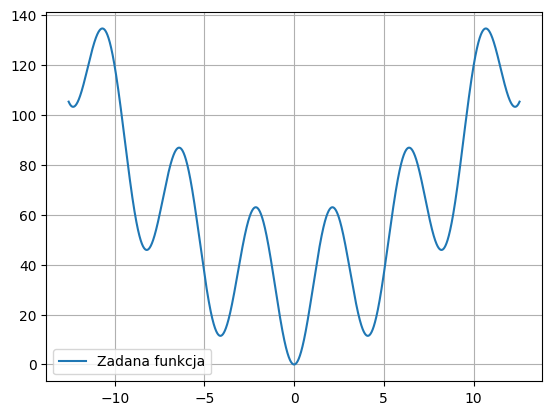

In [49]:
f2_plot_x = np.linspace(f2_a, f2_b, 10000)
f2_plot_y = [f2(f2_plot_x[i]) for i in range(10000)]

plt.plot(f2_plot_x, f2_plot_y, label = "Zadana funkcja")

plt.legend()
plt.grid(True)
plt.savefig("zadana_funkcja.png")
plt.show()

In [54]:
def interpolate(interpolation_function, point_generation_function, n, test_points_count, nodes_plot_label = 'Węzły'):
    
    xs = point_generation_function(f2_a, f2_b, n)
    ys = [f2(xs[i]) for i in range(len(xs))]

    check_x = get_evenly_distributed(f2_a, f2_b, test_points_count)
    check_y = []

    for i in range(len(check_x)):

        check_y.append(interpolation_function(xs, ys, check_x[i]))

    plt.plot(f2_plot_x, f2_plot_y, color = 'blue', label = "Funkcja interpolowana")
    plt.plot(check_x, check_y, color = 'red', label = "Funkcja interpolująca")
    plt.scatter(xs, ys, color = 'black', label=nodes_plot_label)
    
    plt.legend()
    plt.grid(True)
    plt.savefig("interpolacja.png")
    plt.show()


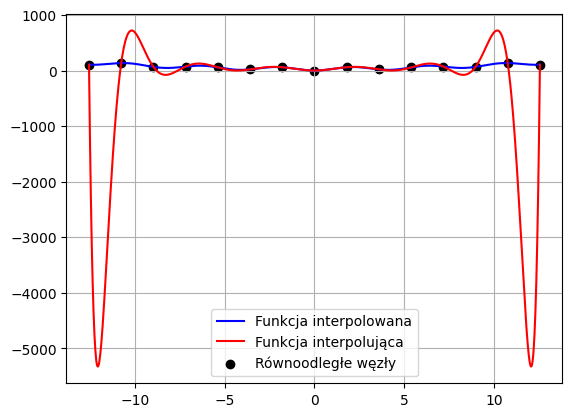

In [55]:
interpolate(lagrange_interpolation, get_evenly_distributed, 15, 1000, 'Równoodległe węzły')
plt.show()

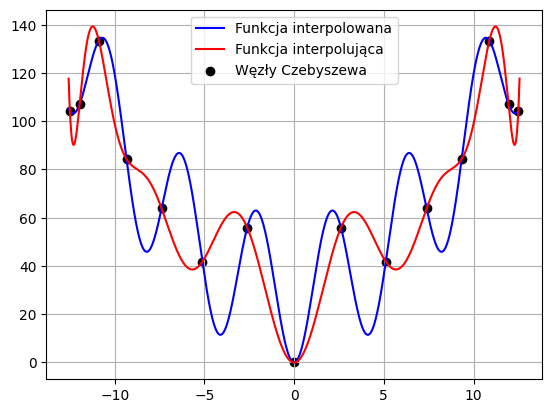

In [56]:
interpolate(lagrange_interpolation, get_chebyshev_nodes, 15, 1000, 'Węzły Czebyszewa')
plt.show()

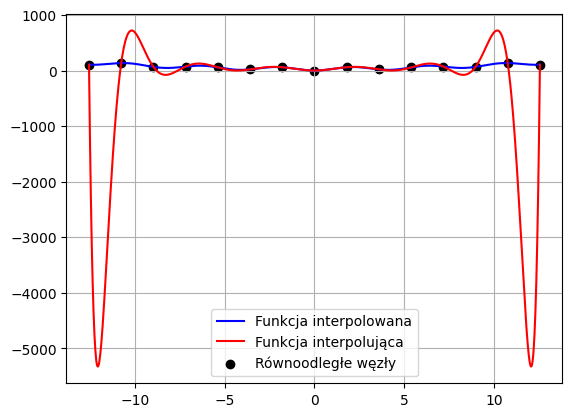

In [57]:
interpolate(newton_interpolation, get_evenly_distributed, 15, 1000, 'Równoodległe węzły')
plt.show()

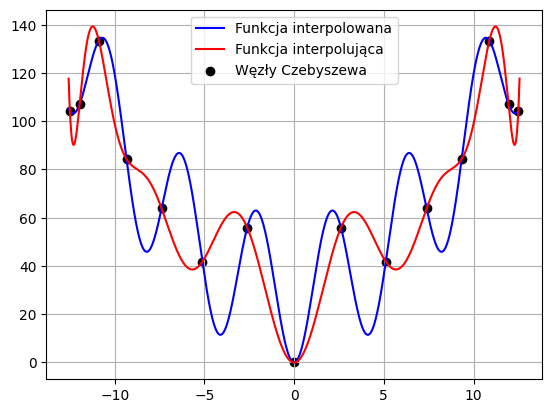

In [58]:
interpolate(newton_interpolation, get_chebyshev_nodes, 15, 1000, 'Węzły Czebyszewa')

Różnica między wielomianem interpolowanym, a wielomienaem interpolującym

1. Maksimum

max na x należącym do [-4pi, 4pi] z |F(x) - Pn(x)|

2. Błąd średniokwadratowy

!/N suma (F(x) - Pn(x))^2

1. Maksumum

1.1 Różnica maksimum dla interpolacji lagrange'a z równomiernie wygenerowanymi węzłami

In [1]:
def interpolation_maximum_difference(interpolation_function, point_generation_function, test_points_count):

    #Wartości n do przetestowania od 3 do 30
    N = [i for i in range(31, 100 + 1)]

    for i in range(len(N)):

        maksimum = float('-inf')

        #Evenly distributed xs
        xs = point_generation_function(f2_a, f2_b, N[i])
        ys = [f2(xs[i]) for i in range(len(xs))]

        test_x = get_evenly_distributed(f2_a, f2_b, test_points_count)
        
        for j in range(test_points_count):

            temp = abs(f2(test_x[j]) - interpolation_function(xs, ys, test_x[j]))

            maksimum = temp if temp > maksimum else maksimum
    
        print(f"{maksimum}")

In [3]:
interpolation_maximum_difference(lagrange_interpolation, get_evenly_distributed, 1000)

NameError: name 'lagrange_interpolation' is not defined

In [192]:
interpolation_maximum_difference(lagrange_interpolation, get_chebyshev_nodes, 1000)

0.0003761201992773522
0.0002481198683881858
3.585156157726033e-05
2.283580239728633e-05
2.9732376276569994e-06
1.8404186851728177e-06
2.1681920259197796e-07
1.3106805417384404e-07
1.4027918382453208e-08
8.313059018938418e-09
8.113829608191736e-10
4.728217817273617e-10
4.219202764943475e-11
2.4268587139886222e-11
2.0889956431346945e-12
1.1937117960769683e-12
3.694822225952521e-13
2.7000623958883807e-13
2.8421709430404007e-13
1.9895196601282805e-13
2.1316282072803006e-13
2.2737367544323206e-13
2.4158453015843406e-13
2.8421709430404007e-13
2.7000623958883807e-13
3.979039320256561e-13
2.7000623958883807e-13
3.126388037344441e-13
2.5579538487363607e-13
2.8421709430404007e-13
2.2737367544323206e-13
2.5579538487363607e-13
2.8421709430404007e-13
3.268496584496461e-13
3.126388037344441e-13
2.5579538487363607e-13
2.984279490192421e-13
2.5579538487363607e-13
3.836930773104541e-13
3.410605131648481e-13
2.8421709430404007e-13
2.984279490192421e-13
3.126388037344441e-13
4.263256414560601e-13
3.41060

In [193]:
interpolation_maximum_difference(newton_interpolation, get_evenly_distributed, 1000)

7.248324252545331
4.978209226292549
1.363729064413846
0.942327726258938
0.2242886419920893
0.15636518799729515
0.03284574698962217
0.02298812507605419
0.004286776709875539
0.003034348978118828
0.0005313057897637918
0.00044879756184457165
0.00010909281184012798
0.00011825054633618493
0.00016999167768005918
0.00018706208305729888
0.00021026223335240957
0.00026663855426534155
0.0010047533012595977
0.0005086785913590575
0.0015783997026090901
0.001869958570551944
0.0022668135785863797
0.016506110129768103
0.08110177509365712
0.041244039761792806
0.2271139687592978
0.05431037484565593
0.3761905074548366
0.12253582346390601
1.5109325084596605
1.6220259407841695
4.8461722144066215
21.177859346336234
26.23717515124318
31.163361904550527
12.77490161551259
30.831947317621996
317.7670287733912
457.15327276827134
679.2148466720656
2143.131851949561
5866.607409302106
982.3156001595506
29093.704891646106
37341.06660910243
103207.02970433555
104030.20096301772
759038.2391050993
2185490.0621534097
2053

In [194]:
interpolation_maximum_difference(newton_interpolation, get_chebyshev_nodes, 1000)

0.0003783274834745498
0.00024812078297742346
6.877908359115281e-05
8.070229213785751e-05
0.0001290022712936434
9.110393942535211e-05
0.00012198617477565676
0.00019806449472525856
0.0003506465931195635
0.00016789668092087595
0.00038823269701993013
0.0006472300636914952
0.0007880731748741709
0.0006938252706021331
0.0014707799552695633
0.0019317972875825262
0.0016772047234070442
0.0014425436439324812
0.0034743893047846086
0.0023242227229332
0.0018485688989358096
0.004327887628690519
0.003998809150473903
0.006185529537589218
0.005975944455514082
0.010298560622061359
0.011788700637623606
0.012508907687887927
0.01744029077164555
0.03228050144663541
0.015508265166616297
0.10320539899706205
1.2302101062575446
8.62560393303174
8.11775945593655
13.683913084696584
28.793790783454384
78.5930557948221
1037.7805782746598
876.7274532728011
6251.778774546407
5406.5063343651245
58041.35884073231
13667.458626837355
937359.3036812795
2614443.1405308987
7307085.808186762
18096528.114197508
128042061.30090

2. Błąd średniokwadratowy

In [111]:
def interpolation_mean_difference(interpolation_function, point_generation_function, test_points_count):

    #Wartości n do przetestowania od 3 do 30
    N = [i for i in range(31, 100 + 1)]

    for i in range(len(N)):

        suma = 0

        #Evenly distributed xs
        xs = point_generation_function(f2_a, f2_b, N[i])
        ys = [f2(xs[i]) for i in range(len(xs))]

        test_x = get_evenly_distributed(f2_a, f2_b, test_points_count)
        
        for j in range(test_points_count):

            suma += (f2(test_x[j]) - interpolation_function(xs, ys, test_x[j])) ** 2
    
        print(f"{suma / test_points_count}")

In [112]:
interpolation_mean_difference(lagrange_interpolation, get_evenly_distributed, 1000)

1.2879378716182828
0.5893224423808807
0.04213602934195457
0.019632207560208993
0.0010679782148943866
0.0005050823072759977
2.133958458116281e-05
1.0218728468075366e-05
3.4116925709338076e-07
1.6537120881622587e-07
4.692108669751558e-09
1.960969289783214e-09
2.0525728498452304e-10
4.194327166991456e-10
1.2257872435369235e-09
8.829283340483877e-09
2.3540294739339182e-08
6.189325742646127e-08
2.5120022860669344e-07
5.73820923136323e-07
3.5953255799867348e-06
1.0348648141982349e-05
6.971009449062425e-05
0.00017543797417160603
0.000595247443230495
0.002710230916425105
0.006949887461672592
0.03540550411525289
0.0805584456671823
0.4216545534999664
2.6056769526737127
10.215065072660666
19.14313641414423
207.11268509659246
431.4500303243409
3793.448463809123
4780.601918735657
37540.69721879604
70891.84255689169
333548.8533172626
1024735.1041337017
7781800.8871016065
41972674.05566892
28602040.487658337
750273952.5398177
1033150650.7308607
7123910074.438542
13766047797.86407
46115188213.41563
18

In [113]:
interpolation_mean_difference(lagrange_interpolation, get_chebyshev_nodes, 1000)

3.199137374184176e-08
2.4234334522244425e-08
2.7991307474351163e-10
2.115106986559737e-10
1.86732068400143e-12
1.4081206073503512e-12
9.684124859176025e-15
7.29026267611739e-15
3.9697919979588213e-17
2.9842087515319705e-17
1.3049910160062103e-19
9.797762998749024e-20
3.483241829431616e-22
2.6135874401190896e-22
7.6348632559640865e-25
5.772376525075557e-25
3.944230073439065e-27
3.2021650909019336e-27
3.0876079219566e-27
2.49302096792145e-27
2.7810698287656016e-27
2.546626526325239e-27
2.726720176325924e-27
2.296897441475515e-27
2.8796964511033193e-27
4.907937120854637e-27
3.4109804640539994e-27
4.5697493130613244e-27
2.6190546300503265e-27
4.2240074127211786e-27
2.910810771772271e-27
3.0803339885045056e-27
2.990773939016003e-27
4.127221666510626e-27
4.582489585178449e-27
3.602504600300971e-27
3.942420456528627e-27
3.0716626188338767e-27
4.866938915342257e-27
3.403585155469489e-27
3.848989536145654e-27
3.496248424319215e-27
3.247159473468096e-27
3.921719271988234e-27
4.0112061870857154e-

In [114]:
interpolation_mean_difference(newton_interpolation, get_evenly_distributed, 1000)

1.287936937465063
0.5893211584226556
0.042135900650041094
0.019632379212436265
0.0010680170393589086
0.000505075990942044
2.1307693157018455e-05
1.0222979966502522e-05
3.4166737500652493e-07
1.6779949277510004e-07
4.578500099104659e-09
2.93730476232113e-09
1.1127951907019045e-10
8.220356191804188e-11
2.839536984520739e-10
1.7143054635041818e-10
5.097877255125069e-10
5.759439683108384e-10
8.895899333719066e-09
3.4539471754995095e-09
2.4924226443928655e-08
3.2387276760642945e-08
3.7005313778268765e-08
3.106959374986251e-06
7.930171775348035e-05
1.888462267211562e-05
0.0006261234433237385
2.152861750086827e-05
0.0014967852718317416
8.698069999122099e-05
0.015962815379364233
0.02596762824592837
0.2452011298050667
2.735717237445477
6.9963128886115555
7.247128694553601
1.5446883206293889
4.6925658783965325
834.8225865797028
1398.5359209048547
4102.0675982850935
25211.57377276586
283626.02920619864
5601.62095485133
5234804.315127255
11749447.722617373
85557126.44336858
63722289.4452582
444889

In [115]:
interpolation_mean_difference(newton_interpolation, get_chebyshev_nodes, 1000)

3.196406196209027e-08
2.42611618677737e-08
2.9508273611422796e-10
2.460587564901679e-10
2.3675370692911867e-10
5.6728812264079556e-11
1.383551926841408e-10
4.0254564624572176e-10
1.875301716307735e-09
3.861549944397853e-10
1.5550623117126538e-09
2.8485233103902767e-09
5.802547116092831e-09
3.6019995139220407e-09
1.104500477026338e-08
4.091380945129352e-08
1.9324196560321828e-08
1.6074083630318574e-08
4.019109678786197e-08
4.390454491396161e-08
2.968471615334695e-08
1.8901193379425702e-07
1.7516318363313314e-07
3.645163231455275e-07
3.200527664213007e-07
8.630687746823104e-07
7.926925237170579e-07
1.1558995503856624e-06
1.2701846905858229e-06
9.619619452491486e-06
1.6736373205885494e-06
7.313687282760963e-05
0.009054408646878655
0.38942859614370157
0.33277490165197704
0.9564749103007708
5.8523731071946195
17.427927430492655
10247.758598352993
5503.083518891432
260145.24369594402
119306.59954127236
19752418.094484564
440479.0908588128
4406342196.598846
32591073767.991688
297717687085.366

ANALIZA

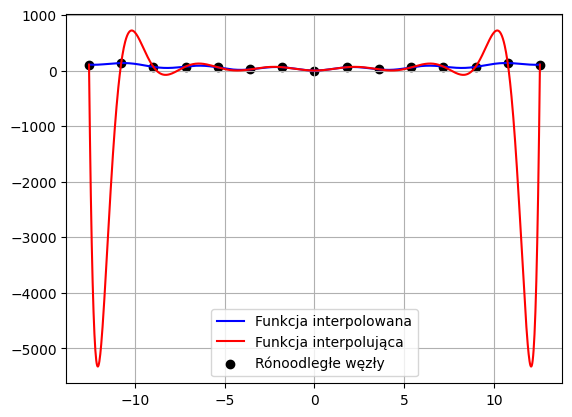

In [64]:
interpolate(lagrange_interpolation, get_evenly_distributed, 15, 1000, 'Rónoodległe węzły')
plt.show()

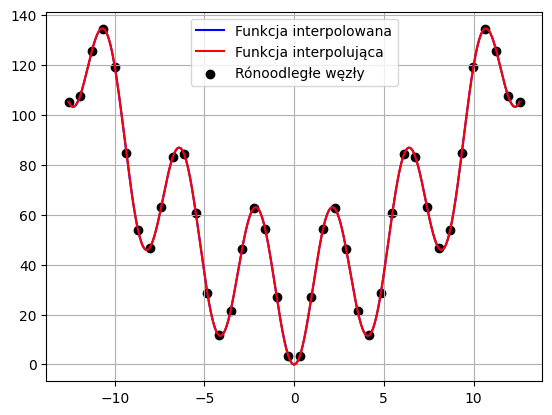

In [66]:
interpolate(lagrange_interpolation, get_evenly_distributed, 40, 1000, 'Rónoodległe węzły')
plt.show()

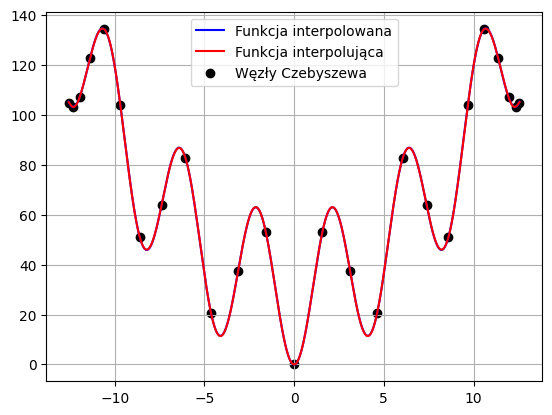

In [67]:
interpolate(lagrange_interpolation, get_chebyshev_nodes, 25, 1000, 'Węzły Czebyszewa')
plt.show()

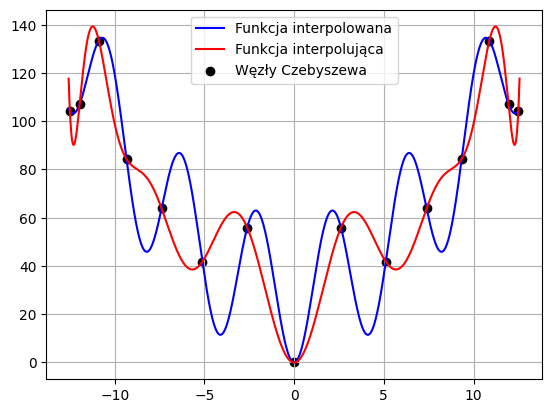

In [65]:
interpolate(lagrange_interpolation, get_chebyshev_nodes, 15, 1000, 'Węzły Czebyszewa')

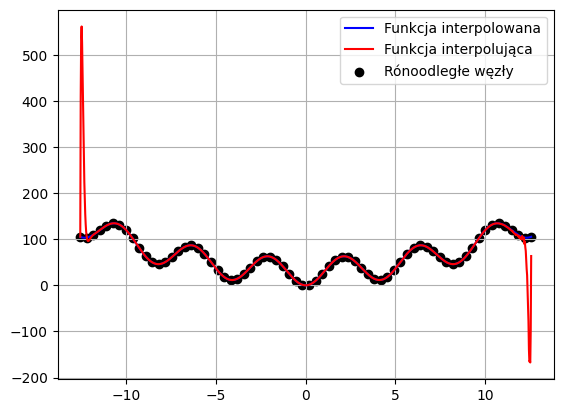

In [61]:
interpolate(newton_interpolation, get_evenly_distributed, 70, 1000, 'Rónoodległe węzły')

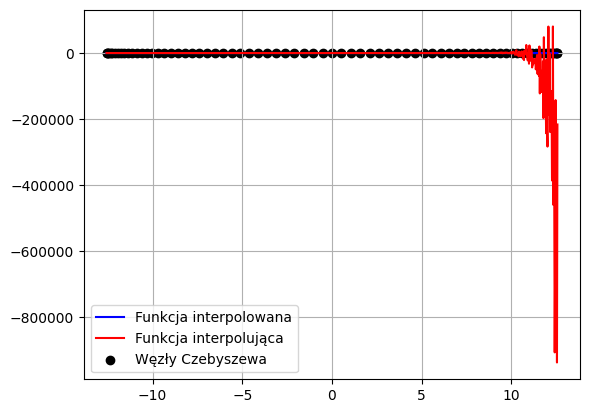

In [63]:
interpolate(newton_interpolation, get_chebyshev_nodes, 75, 1000, 'Węzły Czebyszewa')